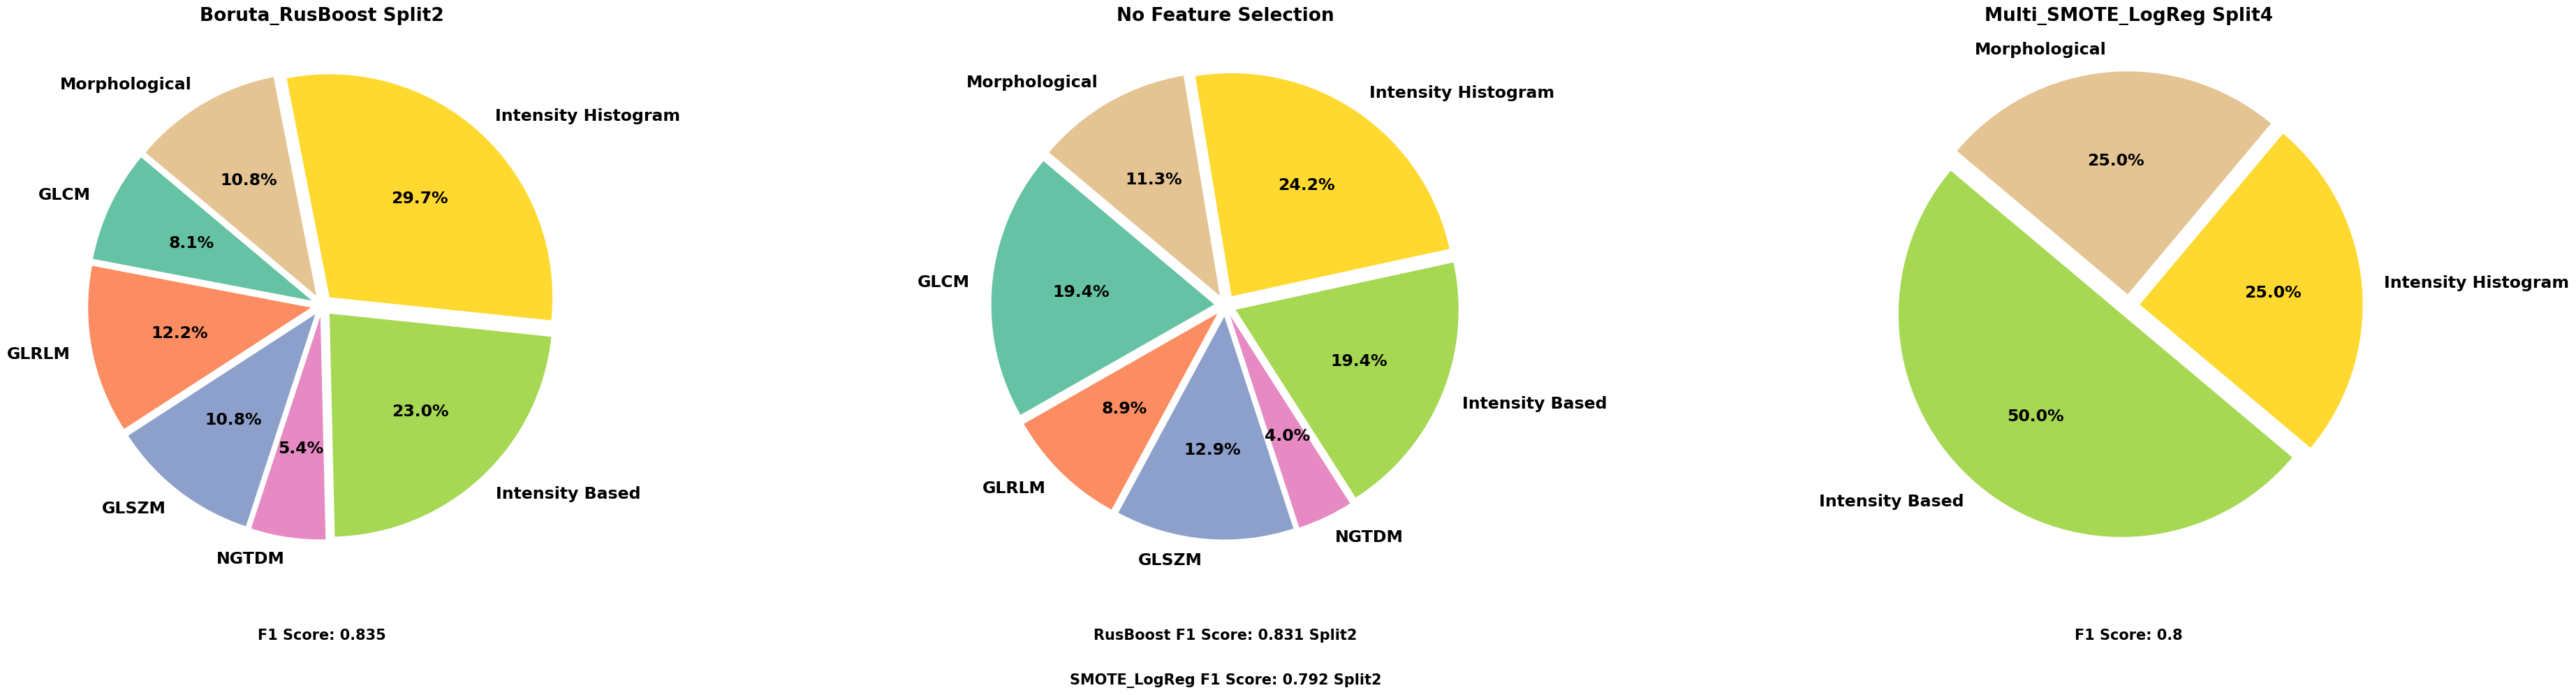

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# List of CSV files
excel_files = [
    '../../Elements/Boruta_RusBoost/AcrossSplits/Split2_Boruta_RusBoost_ReduceDataset.xlsx',  # Replace with actual file names
]
metrics = ["../../Elements/Boruta_RusBoost/AcrossSplits/scores.csv"]
# Dictionary to store F1 scores
f1_scores = {}
index_scores = [2,2,4,4]
# Process each CSV file
i =0
for metric_file in metrics:
    # Load the CSV file
    df = pd.read_csv(metric_file)
    
    # Extract the F1 score at row index 4
    f1_score = df.iloc[index_scores[i]]['F1-score']  

    # Store the F1 score using the file name as the key
    file_name = metric_file.split('/')[3]  # Get the file name
    f1_scores[file_name] = f1_score
    i+=1

# Define regex patterns for different families
patterns = {
    'GLCM': re.compile(r'BAS_GLCM_'),
    'GLRLM': re.compile(r'BAS_GLRLM_'),
    'GLSZM': re.compile(r'BAS_GLSZM_'),
    'NGTDM': re.compile(r'BAS_NGTDM_'),
    'Intensity Based': re.compile(r'BAS_INTENSITYBASED_'),
    'Intensity Histogram': re.compile(r'BAS_INTENSITYHISTOGRAM_'),
    'Morphological': re.compile(r'BAS_MORPHOLOGICAL_'),
}

# Initialize the feature family counts for each file
feature_family_counts = {}

split_nums = []

# Process each Excel file
for excel_file in excel_files:
    df = pd.read_excel(excel_file)  # Load the Excel file
    file_name = excel_file.split('/')[3]
    split_num = excel_file.split('/')[-1].split("_")[0]
    feature_family_counts[file_name] = {family: 0 for family in patterns}
    split_nums.append(split_num)
    CHECK_TOT = len(df.columns)
    CHECK_START = 0
    # Classify features and count occurrences
    for col in df.columns:
        for family, pattern in patterns.items():
            if pattern.match(col):
                feature_family_counts[file_name][family] += 1
                CHECK_START += 1
                break
    assert CHECK_TOT == CHECK_START

# Plot pie charts for each file
n_files = len(feature_family_counts)
fig, axes = plt.subplots(nrows=1, ncols=n_files-1, figsize=(10 * n_files, 10), squeeze=False)

colors = plt.get_cmap('Set2').colors  

for i, (file_name, counts) in enumerate(feature_family_counts.items()):
    if i == 3:
        continue
    ax = axes[0, i]  # Access the Axes object
    labels = list(counts.keys())
    sizes = list(counts.values())
     # Filter out categories with zero values
    filtered_labels = [label for label in labels if counts[label] > 0]
    filtered_sizes = [size for size in sizes if size > 0]
    
    filtered_colors = [colors[labels.index(label)] for label in filtered_labels]

    explode = [0.05] * len(filtered_labels)  # Slightly explode all slices for better visibility
    
    
    wedges, texts, autotexts = ax.pie(
        filtered_sizes, 
        labels=filtered_labels, 
        autopct=lambda p: f'{p:.1f}%' if p > 0 else '',  # Only show non-zero percentages
        startangle=140, 
        colors=filtered_colors, 
        explode=explode
    )
    
    # Customize font sizes and appearance
    for text in texts:
        text.set_fontsize(17)
        text.set_fontweight('bold')
    
    for autotext in autotexts:
        autotext.set_fontsize(17)
        autotext.set_fontweight('bold')
        
    # Add the F1 score below the pie chart
    f1_score = f1_scores[file_name]
    if i == 1:
        ax.text(0, -1.5, f'RusBoost F1 Score: {f1_score}'+" "+ split_nums[i], ha='center', fontsize=15, fontweight='bold')
        ax.text(0, -1.7, f'SMOTE_LogReg F1 Score: {f1_scores["SMOTE_LogReg"]}'+" "+ split_nums[i], ha='center', fontsize=15, fontweight='bold')
        ax.set_title("No Feature Selection", fontsize=19, fontweight='bold')

    else:
        ax.text(0, -1.5, f'F1 Score: {f1_score}', ha='center', fontsize=15, fontweight='bold')
        ax.set_title(file_name + " "+ split_nums[i], fontsize=19, fontweight='bold')

plt.tight_layout()
plt.show()